In [49]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd


from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Gradient Descent
YWBAT
* explain what a cost function is
* give some examples of cost functions
* explain what a cost function is a function of
* explain how step sizes work in gradient descent
* the pros and cons of gradient descent


## components
* cost function
* learning rate (step size)
* regularization parameters



## What is a cost function?
* a function that measures error between ytrue and ypred
    * mean squared error
    * residual sum squares
    * root mean squared error
    * residuals
    * least squares 
    * mean absolute error
    * weighted square of the distance from the nominal value (add weights to mean squared error)


## What is the cost function a function of?
* what determines error?
    * Our predictions
        * beta coefficients
        
$ C(\text{y_hat}) = C(\beta)$

## Algorithm
* pick a random set of beta coefficients
* find the gradient at that point
* update the beta coefficients by subtracting the gradient * learning_rate

### when to stop
* when the derivative is close to 0 within some tolerance that you set (0.001)
* or when your beta updates are within some tolerance (0.0001)



## Pros and Cons

### Pros
* Find your beta coefficients without having to guess and check
* Regression methods (linear/polynomial) typically there's only one minimum

### Cons
* local mins might be found before global min
    * stochastic gradient descent - you create a sample of starting points and optimize each starting point, then take the best one.
    * adaptive momentum - adam optimization - this is the best, usually.

In [57]:
# let's do some dumb form of finding a good coefficient

beta1 = 1

true_slope = np.random.randint(-20, 25)

x = np.random.normal(50, 15, 1000)
noise = np.random.normal(30, 50, 1000)
y = true_slope*x + noise

yhat = beta1*x

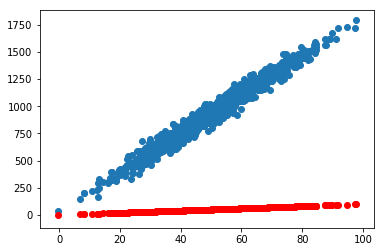

In [58]:
plt.scatter(x, y)
plt.scatter(x, yhat, c='r')
plt.show()

In [59]:
beta_guesses = np.linspace(1, 50, 200)
errors = []

# I'm guessing some beta coefficients

for beta in beta_guesses:
    yhat = beta*x
    error = mean_squared_error(y, yhat, squared=False)
    errors.append(error)

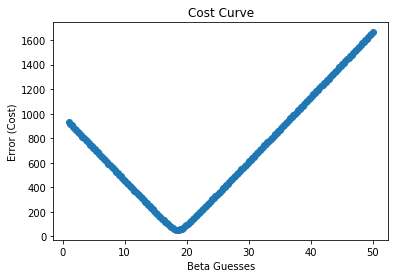

In [65]:
plt.scatter(beta_guesses, errors)
plt.xlabel("Beta Guesses")
plt.ylabel("Error (Cost)")
plt.title("Cost Curve")
plt.show()

In [62]:
error_betas = list(zip(errors, beta_guesses))
sorted_error_betas = sorted(error_betas, key=lambda x: x[0])
sorted_error_betas[:5]

[(51.31672961261308, 18.48241206030151),
 (51.98850128415112, 18.728643216080403),
 (53.88382435491704, 18.236180904522612),
 (55.782247265827955, 18.974874371859297),
 (59.27042797807947, 17.98994974874372)]

In [63]:
best_beta = sorted_error_betas[0][1]
y_best = x*best_beta

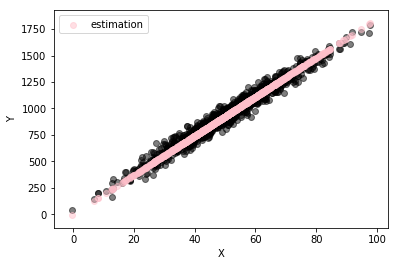

In [64]:
plt.scatter(x, y, c='k', alpha=0.5)
plt.scatter(x, y_best, c='pink', alpha=0.5, label='estimation')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Knowledge Check
* What is a cost function?
    * a cost function is a function that measures error
* A cost function is a function of _______
    * linear regression - beta coefficients
    * polynomial regression - beta coefficients
    * logistic regression - beta coefficients
    * fully connected neural network - weights
    * convolutional neural network - filters
* Why is the derivative important?
    * Gives us the slope and tells us the direction of our next step
* What does the learning rate do?
    * it dictates the size of the step that we take
    * too small of a learning rate and
        * long run times
        * takes forever
        * might time out before it finds the best slope
        * could get stuck in a local minimum
    * too large of a learning rate and 
        * overshoot your minimum and get lost
        * could also take too long

# What did we learn today?
* a cost function isn't just one thing. It's a func of beta, not x
* navigating around local minima
* Adam optimization
* different words for the same thing depending on which branch you're coming from
* too small of a learning rate could be too slow
* each dot on the cost function represents a model 